In [31]:
# import libraries
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ground Truth : 5')

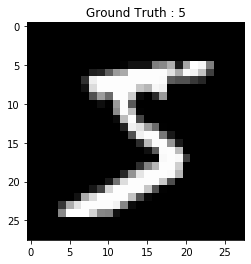

In [32]:
# Loading data and plotting the digit
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

In [33]:
# Processing the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')
#scale data
train_data //=255
test_data //=255
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [34]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
          validation_data=(test_data, test_labels_one_hot))


Epoch 1/20
235/235 [==============================] - 5s 23ms/step - loss: 1.7789 - accuracy: 0.3780 - val_loss: 1.6563 - val_accuracy: 0.4075
Epoch 2/20
235/235 [==============================] - 6s 24ms/step - loss: 1.6103 - accuracy: 0.4212 - val_loss: 1.6492 - val_accuracy: 0.4131
Epoch 3/20
235/235 [==============================] - 5s 23ms/step - loss: 1.5705 - accuracy: 0.4315 - val_loss: 1.6224 - val_accuracy: 0.4215
Epoch 4/20
235/235 [==============================] - 7s 29ms/step - loss: 1.5428 - accuracy: 0.4415 - val_loss: 1.6179 - val_accuracy: 0.4175
Epoch 5/20
235/235 [==============================] - 6s 24ms/step - loss: 1.5227 - accuracy: 0.4466 - val_loss: 1.6200 - val_accuracy: 0.4210
Epoch 6/20
235/235 [==============================] - 5s 22ms/step - loss: 1.5059 - accuracy: 0.4528 - val_loss: 1.6177 - val_accuracy: 0.4239
Epoch 7/20
235/235 [==============================] - 5s 22ms/step - loss: 1.4899 - accuracy: 0.4549 - val_loss: 1.6182 - val_accuracy: 0.4256

In [35]:
# Evaluation
prediction = model.predict_classes(test_data[[0], :])
print(prediction)
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

print("Evaluation of the model on testing data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("*********************************")
print(history.history.keys())

[7]
313/313 [==============================] - 1s 2ms/step - loss: 1.7527 - accuracy: 0.4270
Evaluation of the model on testing data : Loss = 1.7526500225067139, accuracy = 0.4269999861717224
*********************************
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


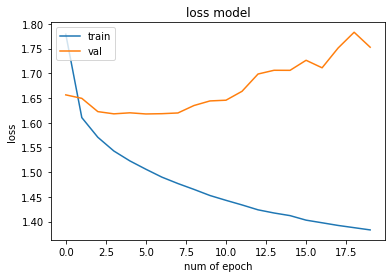

In [36]:
# question 1
# using history object for plotting loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('num of epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

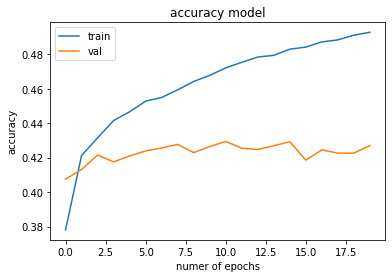

In [37]:
# using history object for plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy model')
plt.ylabel('accuracy')
plt.xlabel('numer of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()